In [144]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
mdf = pd.merge(df, rd, on="city")
# Display the data table for preview
mdf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


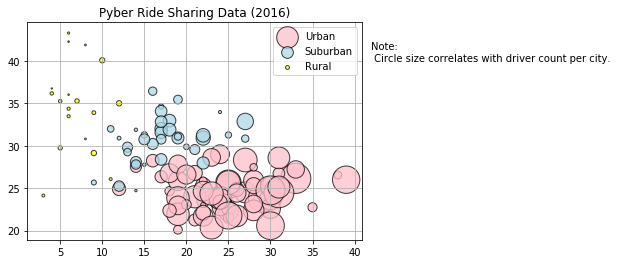

In [200]:
urbandf = mdf.loc[mdf['type'] == "Urban"]
subdf = mdf.loc[mdf['type'] == "Suburban"]
ruraldf = mdf.loc[mdf['type'] == "Rural"]

urbangb = urbandf.groupby('city')
subgb = subdf.groupby('city')
ruralgb = ruraldf.groupby('city')

urbanx = urbangb['ride_id'].count()
urbany = urbangb['fare'].mean()
urban_dc = urbangb['driver_count'].sum()

subx = subgb['ride_id'].count()
suby = subgb['fare'].mean()
sub_dc = subgb['driver_count'].sum()

ruralx = ruralgb['ride_id'].count()
ruraly = ruralgb['fare'].mean()
rural_dc = ruralgb['driver_count'].sum()

plt.scatter(urbanx, urbany, s=urban_dc/2.5, alpha=.75, c="pink", edgecolor="k")
plt.scatter(subx, suby, s=sub_dc/2.5, alpha=.75, c="lightblue", edgecolor="k")
plt.scatter(ruralx, ruraly, s=rural_dc/2.5, alpha=.75, c="yellow", edgecolor="k")

plt.grid()
unique = mdf['type'].unique()
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")
plt.legend(unique)

## Bubble Plot of Ride Sharing Data

In [171]:
# Show plot
plt.show()

## Total Fares by City Type

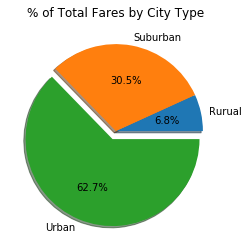

In [172]:
# Calculate Type Percents
gb = mdf.groupby('type').agg({"fare": "sum"})
fares = gb['fare'].values
totalfares = sum(fares)
gb['mean'] = gb['fare'] / totalfares * 100
# urbanpurcent = gb['mean']['Urban']
# suburbanpercent = gb['mean']['Suburban']
# ruralpercent = gb['mean']['Rural']
percentlist = [gb['mean'][x] for x in gb.index]

# Build Pie Chart
plt.pie(percentlist, labels=["Rurual", "Suburban", "Urban"], explode=(0, 0, .1), autopct='%1.1f%%', shadow=True)
# Save Figure
plt.title("% of Total Fares by City Type")
plt.savefig("%_total_fares_by_citytype.png")

In [173]:
# Show Figure
plt.show()

## Total Rides by City Type

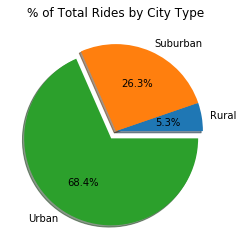

In [174]:
# Calculate Ride Percents
gb = mdf.groupby('type').agg({"ride_id": "count"})
sizes = gb['ride_id'].values
total = sum(sizes)
total
labels = ["Rural", "Suburban", "Urban"]
sizes = [gb['ride_id'][x]/total*100 for x in gb.index]

# Build Pie Chart
plt.pie(sizes, labels=labels, explode=(0, 0, .1), autopct='%1.1f%%', shadow=True)
# Save Figure
plt.title("% of Total Rides by City Type")
plt.savefig("%_total_rides_by_citytype.png")
plt.show()

In [175]:
# Show Figure
plt.show()

## Total Drivers by City Type

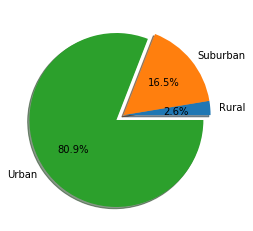

In [180]:
# Calculate Driver Percents
gb = mdf.groupby('city').first()
gb = gb.groupby('type').agg({"driver_count": "sum"})
sizes = gb['driver_count'].values
total = sum(sizes)
labels = ["Rural", "Suburban", "Urban"]
sizes = [gb['driver_count'][x]/total*100 for x in gb.index]
# Build Pie Charts

plt.pie(sizes, labels=labels, explode=(0, 0, .1), autopct='%1.1f%%', shadow=True)
# Save Figure
plt.savefig("Total_drivers_by_citytype.png")
# Show Figure
plt.show()
